In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date



In [6]:
df=pd.read_csv('../data/x_train_final.csv',usecols=range(2, 10),parse_dates=['date'])
df.head()

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0


In [18]:
df_y=pd.read_csv('../data/y_train_final_j5KGWWK.csv',usecols=[1,1])
df_y.head()

,p0q0
0,-1.0
1,-1.0
2,-1.0
3,1.0
4,3.0


In [21]:
df_concat=pd.concat([df,df_y],axis=1)
df_concat.head()

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,jours_semaine,p0q0
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,1,-1.0
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,1,-1.0
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,1,-1.0
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,1,1.0
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,1,3.0


In [22]:
#création fonction pour définir si le rain est en avance ou en retard

def ponctualite(valeur):
    if valeur <0 :
        res ='retard'
    elif valeur>0:
        res = 'avance'
    else:
        res='one_time'
    return res

In [28]:

df_concat['ponctualité']=df_concat['p0q0'].apply(lambda x: ponctualite(x))
df_concat.head()

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,jours_semaine,p0q0,ponctualité
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,1,-1.0,retard
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,1,-1.0,retard
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,1,-1.0,retard
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,1,1.0,avance
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,1,3.0,avance


In [29]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667264 entries, 0 to 667263
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   train          667264 non-null  object        
 1   gare           667264 non-null  object        
 2   date           667264 non-null  datetime64[ns]
 3   arret          667264 non-null  int64         
 4   p2q0           667264 non-null  float64       
 5   p3q0           667264 non-null  float64       
 6   p4q0           667264 non-null  float64       
 7   p0q2           667264 non-null  float64       
 8   jours_semaine  667264 non-null  int64         
 9   p0q0           667264 non-null  float64       
 10  ponctualité    667264 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 56.0+ MB


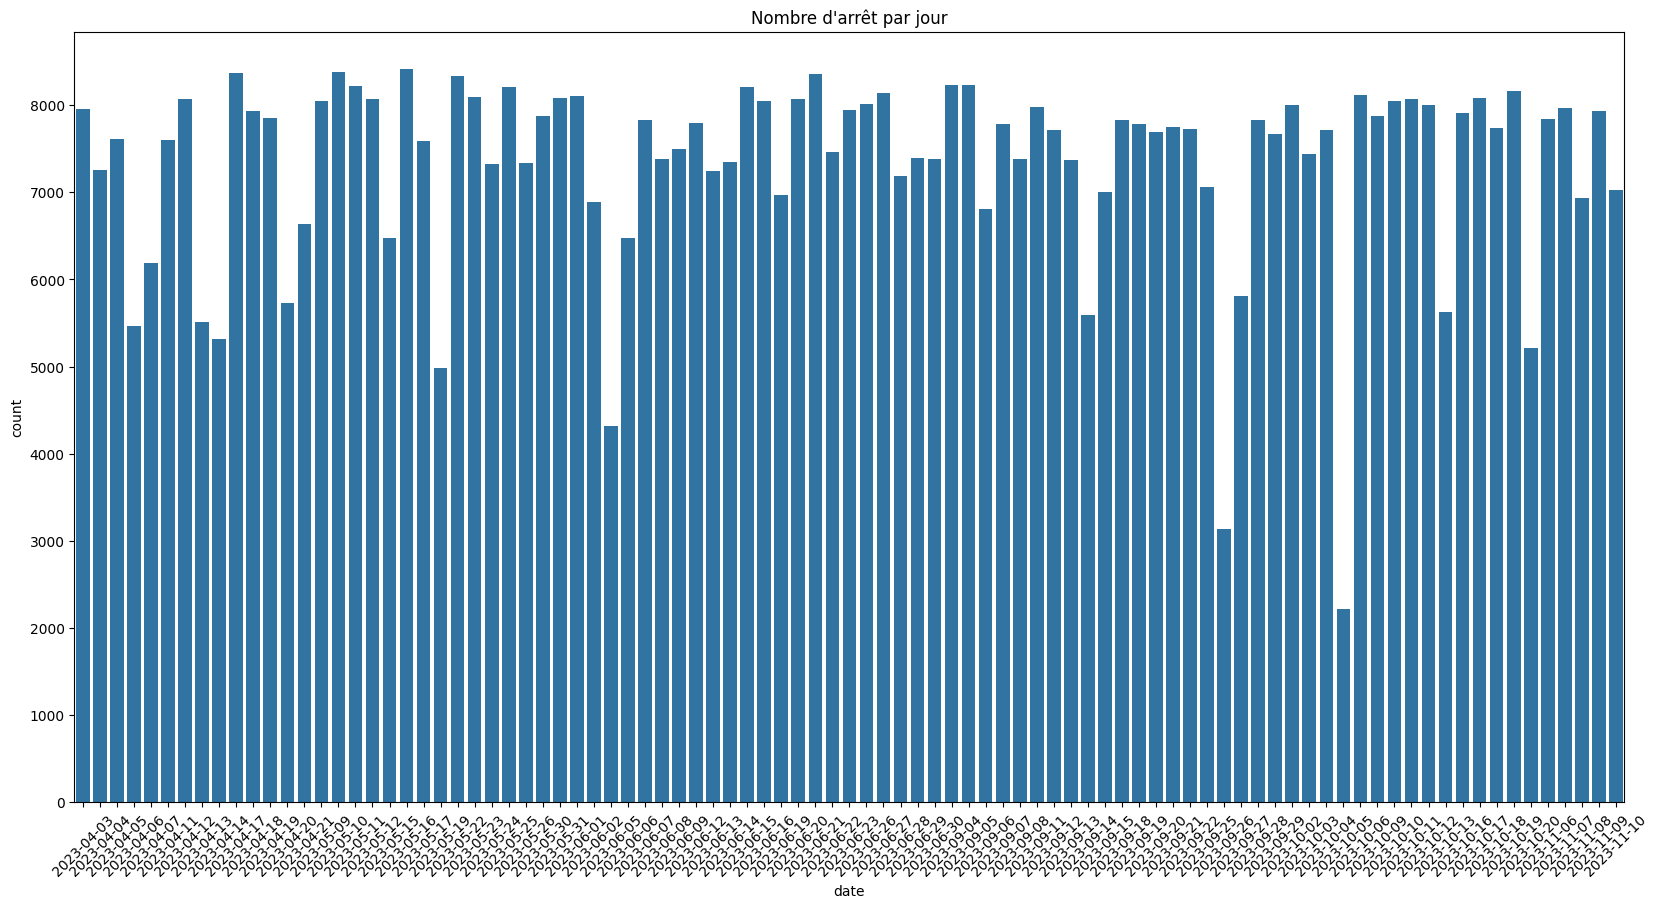

In [8]:
# nombre de d'arrêts par jour
plt.figure(figsize=(20 ,10))
sns.countplot(x='date',data=df)
plt.xticks(rotation=45)
plt.title("Nombre d'arrêt par jour")
plt.show()

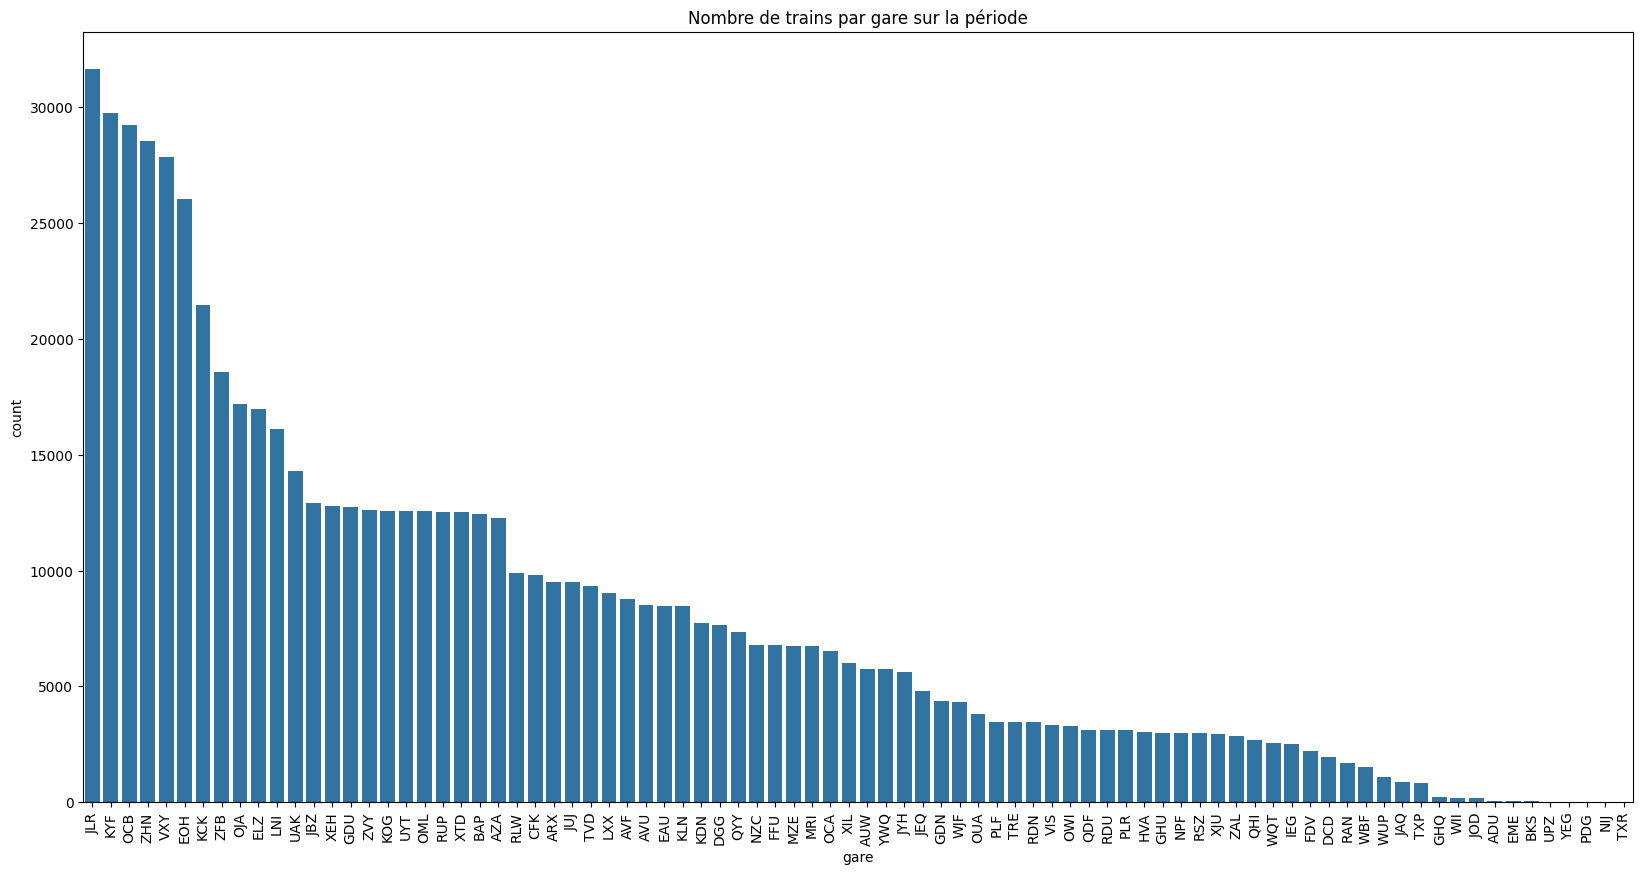

In [9]:
#nombre d'arret par gare

plt.figure(figsize=(20 ,10))
sns.countplot(x='gare',data=df,order=df['gare'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Nombre de trains par gare sur la période')
plt.show()

In [ ]:
df.groupby(['train','date']).count()

,,gare,arret,p2q0,p3q0,p4q0,p0q2
train,date,,,,,,
AAAHVQ,2023-09-05,29,29,29,29,29,29
AAAWZF,2023-06-28,7,7,7,7,7,7
AAAYTD,2023-06-23,12,12,12,12,12,12
AABCGQ,2023-09-26,28,28,28,28,28,28
AABOLE,2023-06-13,21,21,21,21,21,21
...,...,...,...,...,...,...,...
ZZWKXH,2023-10-09,5,5,5,5,5,5
ZZWTHC,2023-11-08,12,12,12,12,12,12
ZZXXLI,2023-09-12,22,22,22,22,22,22


In [10]:
#ajout d'une colonne jour semaine dans df

df['jours_semaine']=df['date'].apply(lambda x :x.isoweekday())
df.head()

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,jours_semaine
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,1
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,1
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,1
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,1
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,1


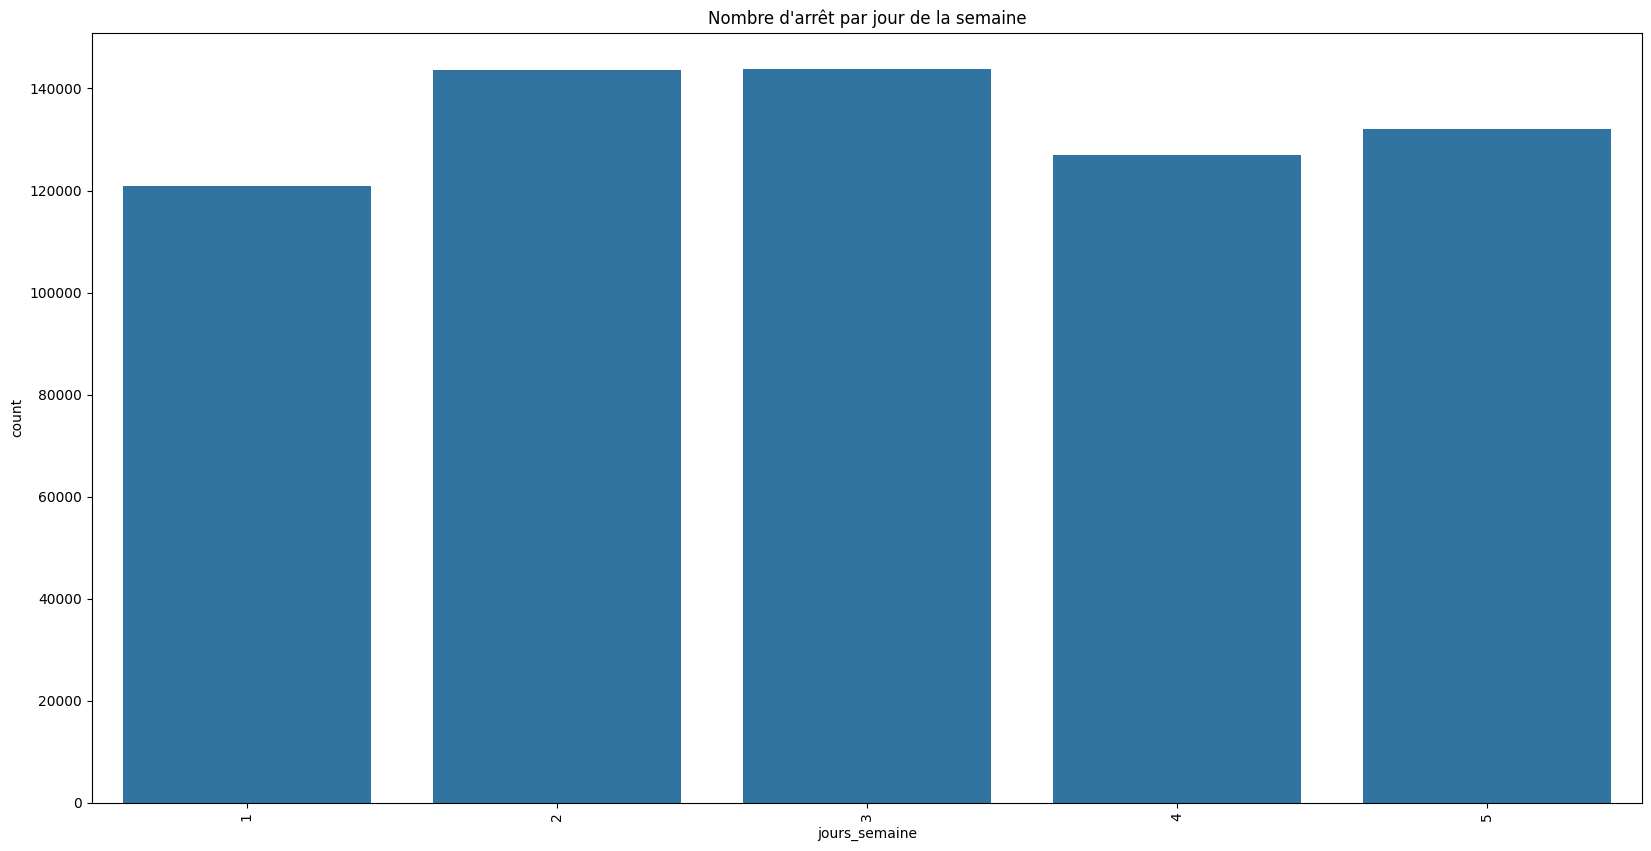

In [11]:
# nombre de d'arrêts par jour de la semaine
plt.figure(figsize=(20 ,10))
sns.countplot(x='jours_semaine',data=df)
plt.xticks(rotation=90)
plt.title("Nombre d'arrêt par jour de la semaine")
plt.show()

In [ ]:
#


df2=df.groupby(['date','jours_semaine']).count().reset_index()

df2.head()

,date,jours_semaine,train,gare,arret,p2q0,p3q0,p4q0,p0q2
0,2023-04-03,1,7951,7951,7951,7951,7951,7951,7951
1,2023-04-04,2,7253,7253,7253,7253,7253,7253,7253
2,2023-04-05,3,7610,7610,7610,7610,7610,7610,7610
3,2023-04-06,4,5465,5465,5465,5465,5465,5465,5465
4,2023-04-07,5,6192,6192,6192,6192,6192,6192,6192


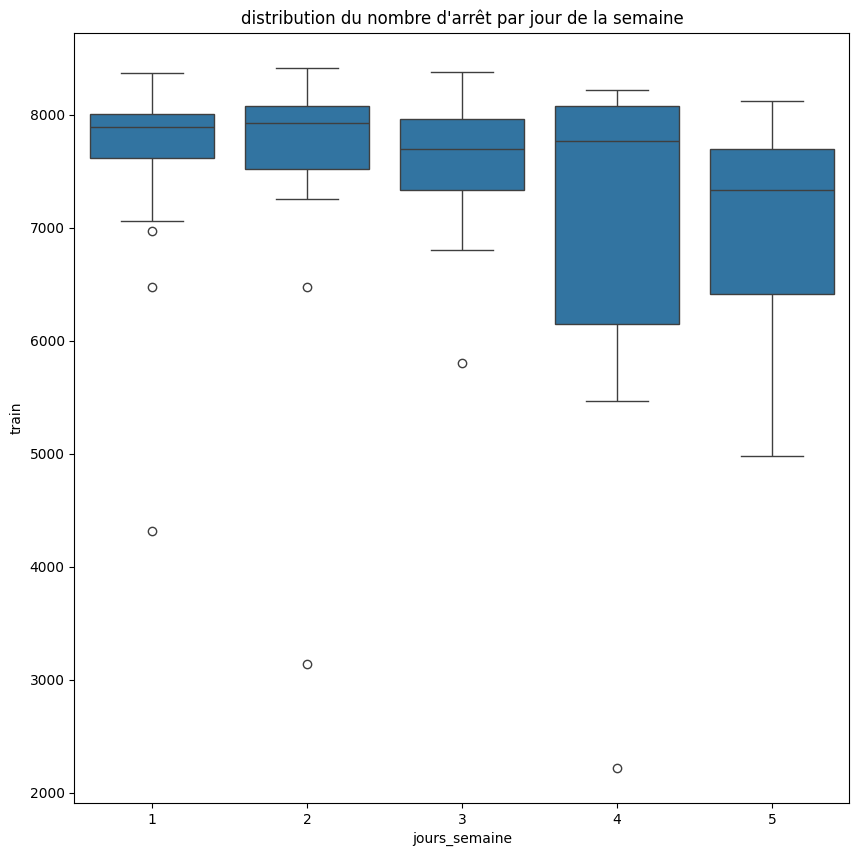

In [16]:
#visualisation distribution nombre de train par jour de la semaine

plt.figure(figsize=(10 ,10))
sns.boxplot(data=df2,x='jours_semaine',y='train')
plt.title("distribution du nombre d'arrêt par jour de la semaine")
plt.show()
